# PlotGrid System - Complete Showcase

This notebook demonstrates the flexible PlotGrid system for creating complex multi-panel visualizations with minimal code.

## Features Demonstrated

1. **Multi-Trace Subplots** - Multiple datasets in the same subplot
2. **DataFrame-Driven Configuration** - Structured metadata approach
3. **Automatic Layout** - Grid sizing from data
4. **Color Schemes** - Automatic and custom palettes
5. **Mixed Plot Types** - Different visualizations in one grid
6. **Both Backends** - Matplotlib and Plotly
7. **Statistical Plots** - Violin, box, bar plots
8. **3D Visualizations** - Scatter3d in grids
9. **Legend Management** - No duplicates, clean legends
10. **Advanced Styling** - Markers, colors, transparency

In [31]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go

from neural_analysis.plotting import (
    PlotGrid,
    PlotSpec,
    GridLayoutConfig,
    ColorScheme,
    PlotConfig,
    plot_comparison_grid,
)

# Set random seed for reproducibility
np.random.seed(42)

print("✓ Imports successful")
print(f"NumPy version: {np.__version__}")
print(f"Pandas version: {pd.__version__}")

✓ Imports successful
NumPy version: 2.2.6
Pandas version: 2.3.3


## 1. Basic Usage - Simple Comparison Grid

The simplest way to create a multi-panel plot: provide a dictionary of datasets.

In [32]:
# Generate sample data
datasets = {
    'Control': np.random.randn(200, 2),
    'Treatment A': np.random.randn(200, 2) + np.array([1, 0.5]),
    'Treatment B': np.random.randn(200, 2) + np.array([-0.5, 1]),
    'Combined': np.random.randn(200, 2) + np.array([0.5, 0.5]),
}

# Create comparison grid (convenience function)
fig = plot_comparison_grid(
    datasets,
    plot_type='scatter',
    rows=2,
    cols=2,
    config=PlotConfig(
        title="Basic Comparison Grid - Four Conditions",
        figsize=(10, 8)
    ),
    backend='plotly'
)

fig.show()
print("\n✓ Basic comparison grid created")


✓ Basic comparison grid created


## 2. Multi-Trace Subplots - The Power Feature

Overlay multiple datasets in the same subplot using `subplot_position`.
This is perfect for direct comparisons.

In [33]:
# Create data for comparison
control_data = np.random.randn(150, 2) * 0.5
treatment_data = np.random.randn(150, 2) * 0.5 + np.array([1.5, 0])

# Method 1: All traces in one subplot
specs_overlay = [
    PlotSpec(
        data=control_data,
        plot_type='scatter',
        subplot_position=0,  # Both in position 0
        title='Control vs Treatment - Overlaid',
        label='Control',
        color='blue',
        alpha=0.5,
        marker_size=6
    ),
    PlotSpec(
        data=treatment_data,
        plot_type='scatter',
        subplot_position=0,  # Same position!
        label='Treatment',
        color='red',
        alpha=0.5,
        marker_size=6
    ),
]

grid = PlotGrid(
    plot_specs=specs_overlay,
    config=PlotConfig(
        title="Multi-Trace Subplot Example",
        figsize=(8, 6)
    ),
    backend='plotly'
)

fig = grid.plot()
fig.show()

print("\n✓ Multi-trace subplot created")
print("Key: Both datasets share subplot_position=0, so they overlay")


✓ Multi-trace subplot created
Key: Both datasets share subplot_position=0, so they overlay


## 3. DataFrame-Driven Configuration

Use a pandas DataFrame to specify complex plotting configurations with metadata.
Perfect for experiments with multiple conditions and groupings.

In [34]:
# Create experimental data with metadata
n_samples = 100
conditions = []

for condition in ['Baseline', 'Low Dose', 'High Dose']:
    for replicate in [1, 2]:
        if condition == 'Baseline':
            data = np.random.randn(n_samples, 2) * 0.5
        elif condition == 'Low Dose':
            data = np.random.randn(n_samples, 2) * 0.6 + np.array([0.5, 0.2])
        else:  # High Dose
            data = np.random.randn(n_samples, 2) * 0.7 + np.array([1.0, 0.5])
        
        conditions.append({
            'data': data,
            'condition': condition,
            'replicate': replicate,
            'plot_type': 'scatter',
            'title': f'{condition} - Rep {replicate}'
        })

# Create DataFrame
plot_df = pd.DataFrame(conditions)

# Create PlotGrid from DataFrame with grouping
grid = PlotGrid.from_dataframe(
    plot_df,
    data_col='data',
    plot_type_col='plot_type',
    title_col='title',
    group_by='condition',  # Automatic color assignment by condition
    config=PlotConfig(
        title="DataFrame-Driven Plot - Drug Dose Response",
        figsize=(12, 8)
    ),
    layout=GridLayoutConfig(rows=2, cols=3),
    backend='plotly'
)

fig = grid.plot()
fig.show()

print("\n✓ DataFrame-driven plot created")
print("Key: Colors automatically assigned by 'condition' group")
print(f"Conditions: {plot_df['condition'].unique()}")


✓ DataFrame-driven plot created
Key: Colors automatically assigned by 'condition' group
Conditions: ['Baseline' 'Low Dose' 'High Dose']


## 4. Mixed Plot Types

Combine different visualization types in a single grid.

In [35]:
# Generate different types of data
scatter_data = np.random.randn(100, 2)
line_x = np.linspace(0, 10, 100)
line_y = np.sin(line_x) + np.random.randn(100) * 0.1
line_data = np.column_stack([line_x, line_y])
histogram_data = np.random.randn(500)
heatmap_data = np.random.randn(20, 20)

# Create specs for different plot types
mixed_specs = [
    PlotSpec(
        data=scatter_data,
        plot_type='scatter',
        title='2D Scatter',
        color='blue',
        marker_size=5,
        alpha=0.6
    ),
    PlotSpec(
        data=line_data,
        plot_type='line',
        title='Sine Wave with Noise',
        color='red',
        line_width=2
    ),
    PlotSpec(
        data=histogram_data,
        plot_type='histogram',
        title='Distribution',
        color='green',
        kwargs={'bins': 40}
    ),
    PlotSpec(
        data=heatmap_data,
        plot_type='heatmap',
        title='Correlation Matrix',
        kwargs={'colorscale': 'RdBu'}
    ),
]

grid = PlotGrid(
    plot_specs=mixed_specs,
    config=PlotConfig(
        title="Mixed Plot Types in One Grid",
        figsize=(12, 10)
    ),
    layout=GridLayoutConfig(rows=2, cols=2),
    backend='plotly'
)

fig = grid.plot()
fig.show()

print("\n✓ Mixed plot types created")
print("Types: scatter, line, histogram, heatmap")


✓ Mixed plot types created
Types: scatter, line, histogram, heatmap


## 5. Custom Color Schemes

Define custom color palettes for your data groups.

In [36]:
# Create grouped data
groups = ['Group A', 'Group B', 'Group C', 'Group D']
group_data = []

for i, group in enumerate(groups):
    data = np.random.randn(80, 2) + np.array([i * 1.5, 0])
    group_data.append({
        'data': data,
        'group': group,
        'plot_type': 'scatter',
        'title': f'{group}'
    })

df_grouped = pd.DataFrame(group_data)

# Method 1: Use built-in palette
grid1 = PlotGrid.from_dataframe(
    df_grouped,
    group_by='group',
    color_scheme=ColorScheme(palette='viridis', alpha=0.7),
    config=PlotConfig(title="Viridis Palette", figsize=(12, 5)),
    layout=GridLayoutConfig(rows=1, cols=4),
    backend='plotly'
)

fig1 = grid1.plot()
fig1.show()

# Method 2: Custom color mapping
custom_colors = ColorScheme(
    group_colors={
        'Group A': '#FF6B6B',  # Red
        'Group B': '#4ECDC4',  # Teal
        'Group C': '#45B7D1',  # Blue
        'Group D': '#FFA07A',  # Orange
    },
    alpha=0.6
)

grid2 = PlotGrid.from_dataframe(
    df_grouped,
    group_by='group',
    color_scheme=custom_colors,
    config=PlotConfig(title="Custom Color Palette", figsize=(12, 5)),
    layout=GridLayoutConfig(rows=1, cols=4),
    backend='plotly'
)

fig2 = grid2.plot()
fig2.show()

print("\n✓ Custom color schemes demonstrated")
print("Palettes: viridis (built-in), custom hex colors")


✓ Custom color schemes demonstrated
Palettes: viridis (built-in), custom hex colors


## 6. Automatic Grid Sizing

Let PlotGrid automatically determine the optimal grid layout.

In [38]:
# Create 7 datasets (not a perfect square)
# Use Plotly's default color sequence
plotly_colors = ['blue', 'red', 'green', 'purple', 'orange', 'cyan', 'magenta']
datasets_auto = [
    PlotSpec(
        data=np.random.randn(50, 2) + np.array([i * 0.5, 0]),
        plot_type='scatter',
        title=f'Dataset {i+1}',
        color=plotly_colors[i],
        marker_size=5
    )
    for i in range(7)
]

# No rows/cols specified - automatic sizing
grid_auto = PlotGrid(
    plot_specs=datasets_auto,
    config=PlotConfig(
        title="Automatic Grid Sizing (7 plots → 3x3 grid)",
        figsize=(12, 12)
    ),
    backend='plotly'
)

fig_auto = grid_auto.plot()
fig_auto.show()

print("\n✓ Automatic grid sizing: 7 plots arranged in 3x3 grid")
print("Algorithm: rows = ceil(sqrt(n)), cols = ceil(n / rows)")


✓ Automatic grid sizing: 7 plots arranged in 3x3 grid
Algorithm: rows = ceil(sqrt(n)), cols = ceil(n / rows)


## 7. Multiple Lines in One Plot

Create multi-line plots by using the same subplot_position for all lines.

In [39]:
# Generate multiple time series
n_points = 100
time = np.linspace(0, 10, n_points)

# Different frequency sine waves
frequencies = [1, 2, 3, 4]
colors = ['blue', 'red', 'green', 'purple']

line_specs = []
for freq, color in zip(frequencies, colors):
    y = np.sin(2 * np.pi * freq * time) + np.random.randn(n_points) * 0.1
    line_data = np.column_stack([time, y])
    
    line_specs.append(PlotSpec(
        data=line_data,
        plot_type='line',
        subplot_position=0,  # All in same subplot
        label=f'{freq} Hz',
        color=color,
        line_width=2,
        alpha=0.7
    ))

grid_lines = PlotGrid(
    plot_specs=line_specs,
    config=PlotConfig(
        title="Multiple Time Series Overlaid",
        figsize=(10, 6)
    ),
    layout=GridLayoutConfig(rows=1, cols=1),
    backend='plotly'
)

fig_lines = grid_lines.plot()
fig_lines.update_xaxes(title_text="Time (s)")
fig_lines.update_yaxes(title_text="Amplitude")
fig_lines.show()

print("\n✓ Multi-line plot created")
print(f"Lines: {len(frequencies)} sine waves with different frequencies")


✓ Multi-line plot created
Lines: 4 sine waves with different frequencies


## 8. Complex Scenario: Multi-Group Comparison

Real-world example: Compare multiple conditions across multiple experiments.
Each experiment shows all conditions overlaid.

In [40]:
# Simulate 3 experiments, each with 3 conditions
n_experiments = 3
conditions_exp = ['Control', 'Treatment A', 'Treatment B']
colors_cond = ['blue', 'red', 'green']

complex_specs = []

for exp in range(n_experiments):
    for cond_idx, (condition, color) in enumerate(zip(conditions_exp, colors_cond)):
        # Generate data with some variation per experiment and condition
        if condition == 'Control':
            data = np.random.randn(80, 2) * 0.5
        elif condition == 'Treatment A':
            data = np.random.randn(80, 2) * 0.6 + np.array([exp * 0.3 + 1, 0.5])
        else:  # Treatment B
            data = np.random.randn(80, 2) * 0.6 + np.array([exp * 0.3 + 0.5, 1.0])
        
        complex_specs.append(PlotSpec(
            data=data,
            plot_type='scatter',
            subplot_position=exp,  # Group by experiment
            title=f'Experiment {exp + 1}' if cond_idx == 0 else None,
            label=condition,
            color=color,
            marker_size=4,
            alpha=0.5
        ))

grid_complex = PlotGrid(
    plot_specs=complex_specs,
    config=PlotConfig(
        title="Multi-Experiment, Multi-Condition Analysis",
        figsize=(15, 5)
    ),
    layout=GridLayoutConfig(rows=1, cols=3),
    backend='plotly'
)

fig_complex = grid_complex.plot()
fig_complex.show()

print("\n✓ Complex multi-group comparison created")
print(f"Layout: {n_experiments} experiments × {len(conditions_exp)} conditions")
print("Each subplot shows all 3 conditions overlaid for direct comparison")


✓ Complex multi-group comparison created
Layout: 3 experiments × 3 conditions
Each subplot shows all 3 conditions overlaid for direct comparison


## 9. 3D Scatter Plots in Grid

PlotGrid supports 3D visualizations.

In [41]:
# Generate 3D datasets
n_points_3d = 200

# Use plotly-compatible colors
plotly_colors_3d = ['blue', 'red', 'green', 'purple']
datasets_3d = []
for i in range(4):
    # Create clusters in 3D space
    center = np.array([i * 2, i * 1.5, i])
    data_3d = np.random.randn(n_points_3d, 3) * 0.5 + center
    
    datasets_3d.append(PlotSpec(
        data=data_3d,
        plot_type='scatter3d',
        title=f'Cluster {i+1}',
        color=plotly_colors_3d[i],
        marker_size=3,
        alpha=0.6
    ))

grid_3d = PlotGrid(
    plot_specs=datasets_3d,
    config=PlotConfig(
        title="3D Scatter Plots in Grid",
        figsize=(12, 12)
    ),
    layout=GridLayoutConfig(rows=2, cols=2),
    backend='plotly'
)

fig_3d = grid_3d.plot()
fig_3d.show()

print("\n✓ 3D scatter grid created")
print("Tip: Interactive! Rotate plots by clicking and dragging")


✓ 3D scatter grid created
Tip: Interactive! Rotate plots by clicking and dragging


## 10. Shared Axes

Share axes across subplots for easier comparison.

In [42]:
# Generate related datasets
# Use plotly-compatible colors
plotly_colors_shared = ['blue', 'red', 'green', 'purple']
shared_data = []
for i in range(4):
    x = np.linspace(0, 10, 100)
    y = np.sin(x + i * np.pi/4) + np.random.randn(100) * 0.1
    data = np.column_stack([x, y])
    
    shared_data.append(PlotSpec(
        data=data,
        plot_type='line',
        title=f'Phase Shift {i*45}°',
        color=plotly_colors_shared[i],
        line_width=2
    ))

# Shared x-axes
grid_shared = PlotGrid(
    plot_specs=shared_data,
    config=PlotConfig(
        title="Shared X-Axes Example",
        figsize=(12, 10)
    ),
    layout=GridLayoutConfig(
        rows=2,
        cols=2,
        shared_xaxes='all',  # Share x-axes
        shared_yaxes=False
    ),
    backend='plotly'
)

fig_shared = grid_shared.plot()
fig_shared.show()

print("\n✓ Shared axes plot created")
print("Feature: All subplots share the same x-axis range")


✓ Shared axes plot created
Feature: All subplots share the same x-axis range


## 11. Matplotlib Backend

All features work with matplotlib too!

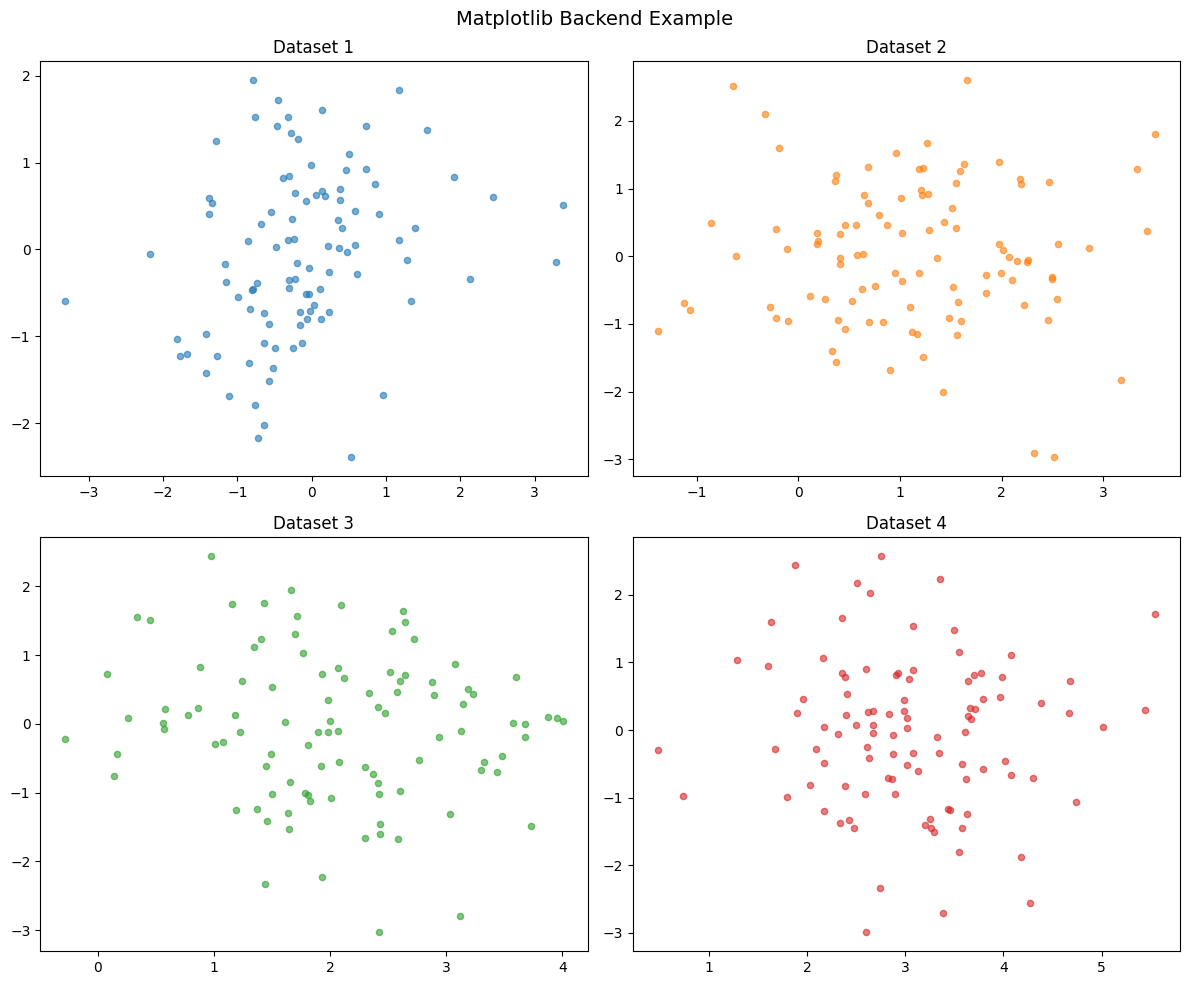


✓ Matplotlib backend plot created
Returns: (figure, axes) tuple for further customization


In [43]:
# Create data
mpl_data = [
    PlotSpec(
        data=np.random.randn(100, 2) + np.array([i, 0]),
        plot_type='scatter',
        title=f'Dataset {i+1}',
        color=f'C{i}',
        marker_size=20,
        alpha=0.6
    )
    for i in range(4)
]

# Use matplotlib backend
grid_mpl = PlotGrid(
    plot_specs=mpl_data,
    config=PlotConfig(
        title="Matplotlib Backend Example",
        figsize=(12, 10)
    ),
    layout=GridLayoutConfig(rows=2, cols=2),
    backend='matplotlib'  # Use matplotlib
)

fig_mpl, axes = grid_mpl.plot()
plt.tight_layout()
plt.show()

print("\n✓ Matplotlib backend plot created")
print("Returns: (figure, axes) tuple for further customization")

## Summary

### Key Features Demonstrated

1. ✅ **Simple Comparison Grid** - `plot_comparison_grid()` for quick visualizations
2. ✅ **Multi-Trace Subplots** - Use `subplot_position` to overlay multiple datasets
3. ✅ **DataFrame Configuration** - Structured, metadata-driven approach
4. ✅ **Mixed Plot Types** - Scatter, line, histogram, heatmap in one grid
5. ✅ **Custom Colors** - Built-in palettes and custom color mappings
6. ✅ **Automatic Layout** - Grid size calculated automatically
7. ✅ **Multi-Line Plots** - Multiple time series overlaid
8. ✅ **Complex Scenarios** - Multi-experiment, multi-condition analysis
9. ✅ **3D Visualizations** - scatter3d plots in grids
10. ✅ **Shared Axes** - Synchronized axes for easier comparison
11. ✅ **Dual Backends** - Works with both matplotlib and plotly

### When to Use What

| Use Case | Approach |
|----------|----------|
| Quick comparison of datasets | `plot_comparison_grid()` |
| Overlay multiple traces | `subplot_position` parameter |
| Rich metadata | `PlotGrid.from_dataframe()` |
| Mixed visualizations | List of `PlotSpec` objects |
| Custom colors | `ColorScheme` class |
| Publication figures | `backend='matplotlib'` |
| Interactive exploration | `backend='plotly'` |

### Best Practices

1. **Use subplot_position** when you want to directly compare data in the same axes
2. **Use separate subplots** when data ranges are very different
3. **Let grid auto-size** unless you have specific layout requirements
4. **Group by metadata** using DataFrames for complex experiments
5. **Choose backend** based on use case: matplotlib for static, plotly for interactive

### Next Steps

- See `docs/plotgrid_system.md` for complete API documentation
- Check `examples/metrics_examples.ipynb` for real-world usage
- Explore `src/neural_analysis/plotting/grid_config.py` for implementation details

Happy plotting! 📊✨